# SOK-1006 V23

## Arbeidskrav 3

### Frist fredag 10. februar kl 18.00 i Canvas

**Lever inn lenken til ditt repo på GitHub hvor løsningen ligger**. Individuell innlevering.

Se Jupyter notatblokk "Forsmak mappe 1" for et forslag til fremgangsmåte her, og kap 9 i boka. Samt forelesning 08.02.

Vi ser på markedet for oppdrettslaks på s. 101-104 i boka, og som vi har analysert i forelesning 5.      

Med en stykkavgift på $t$ kr per enhet pålagt selgere kan vi skrive etterspørsel og tilbud i (1) og (2):   


\begin{equation}
   x^{D}= 500 -3.2p\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3(p-t)\tag{2}
\end{equation}

1. Finn likevektspris og -kvantum for alle verdier av $t$.        
2. Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny.           
2. Tegn likevekten for $t=0$ og fargelegg KO og PO.     
2. Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny.      
4. Bruk de uttrykkene som du har laget for å fylle ut følgende tabell. NB det er mening at du skal fylle ut tabellen med uttrykk som du har regnet i koden (ikke skriv inn tall manuelt - se Forsmak mappe 1.ipynb).

In [207]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [208]:
def x_d(p):
    return 500-3.2*(p)

def x_s(p,t):
    return -100 + 4.3*(p-t)

In [209]:
p,t =sp.symbols('p t', real=True, positive=True)
# lager ligning 
equ=sp.Eq(x_d(p), x_s(p,t))
equ

Eq(500 - 3.2*p, 4.3*p - 4.3*t - 100)

In [210]:
# finner likevektspris. 
p_eq = sp.solve(equ,p)
display(p_eq[0])

# finner likevektskvantum.
x_eq= x_d(p_eq[0])
x_eq

0.573333333333333*t + 80.0

244.0 - 1.83466666666667*t

In [211]:
# ligning med avgift
equ2=sp.Eq(x_d(p), x_s(p,4))

# likevektpris med avgift
p_eq2 = sp.solve(equ2,p)
display(p_eq2[0])

# likevektskvantum med avgift
x_eq2= x_d(p_eq2[0])
x_eq2


82.2933333333333

236.661333333333

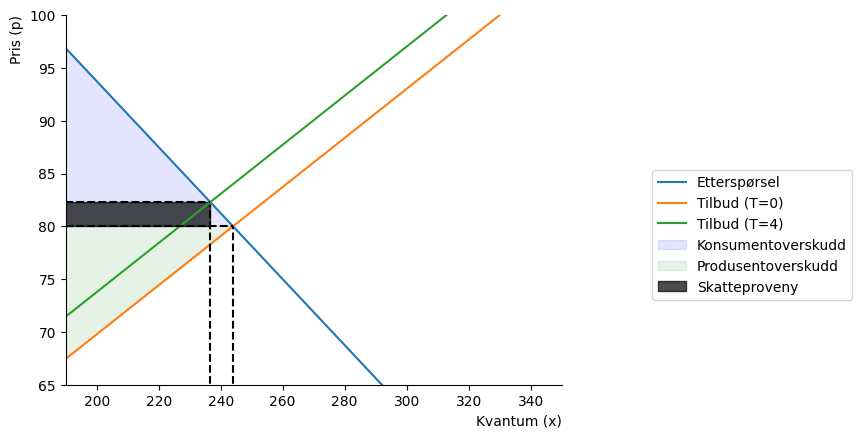

In [251]:
x_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(190,350))
                ax.set(ylim=(65,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

ax.plot(x_d(x_num),x_num, label = 'Etterspørsel')
ax.plot(x_s(x_num,0),x_num, label = 'Tilbud (T=0)')
ax.plot(x_s(x_num,4),x_num,label = 'Tilbud (T=4)')

ax.hlines(80,0,244, color='black',ls='dashed')
ax.vlines(244,0,80, color='black',ls='dashed')

ax.hlines(82.3,0,236.6, color='black',ls='dashed')
ax.vlines(236.6,0,82, color='black',ls='dashed')

z=np.linspace(80,236.6,100)
x=np.linspace(80,0,100)


ax.fill_between(x_d(z),z,80,color = "blue",alpha = 0.1,label='Konsumentoverskudd')
ax.fill_between(x_s(x,0),80,x,color = "green",alpha = 0.1,label='Produsentoverskudd')
ax.fill_between(z,80,82.3, color = 'black', alpha = 0.7, label = 'Skatteproveny')


ax.legend(bbox_to_anchor=(1.6,0.6))

In [ ]:
from IPython.display import Markdown


|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris       |                         |                               | 
|Produsentpris        |                       |                  |                               |
|Kvantum  |  |   |    |
| Konsumentoverskudd: |  | |     |
| Produsentoverskudd: | |  |   |
| KO + PO:    |    | |  |
|Skatteproveny| 0  | | |
| Dødvektstap  |0   |   ||